In [1]:
!pip install yfinance
!pip install statsmodels

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
# List of stock tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Download historical data
data = yf.download(tickers, start="2020-01-01", end="2023-01-01", group_by='ticker')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


In [4]:
# Check for missing values
print(data.isnull().sum())

# Forward fill or drop missing values
data = data.ffill().dropna()

# Ensure the data is indexed by date
data.index = pd.to_datetime(data.index)

Ticker  Price 
MSFT    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
AAPL    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
TSLA    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
GOOGL   Open      0
        High      0
        Low       0
        Close     0
        Volume    0
AMZN    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64


In [5]:
data.to_csv('cleaned_stock_data.csv')

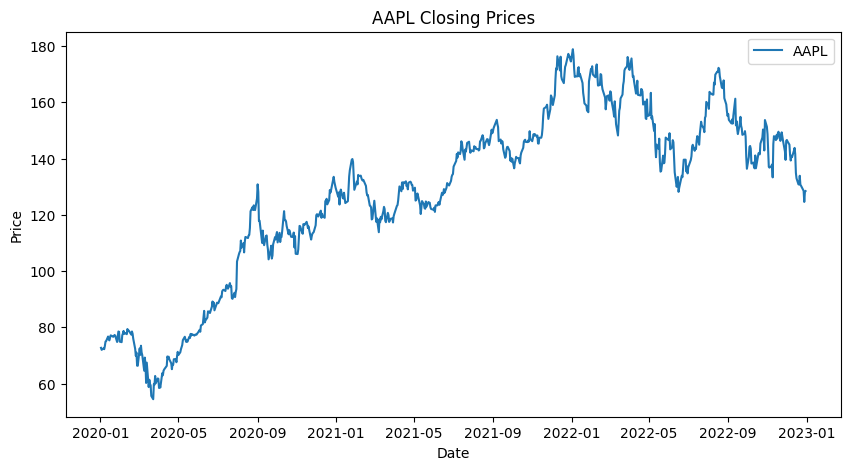

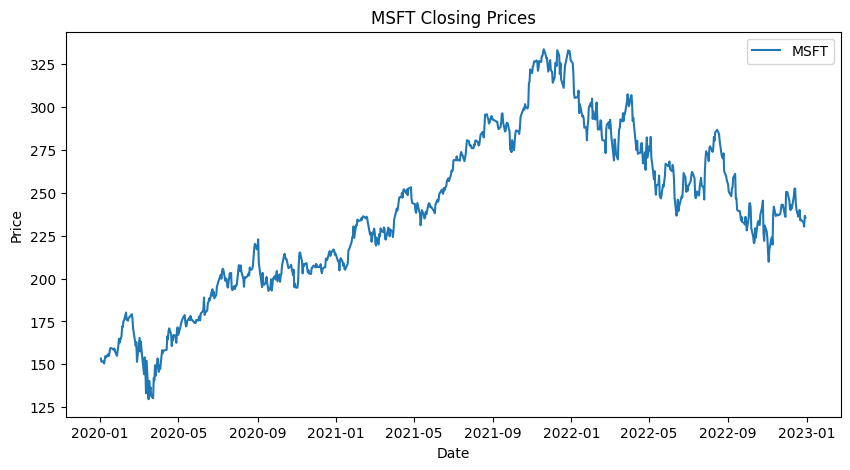

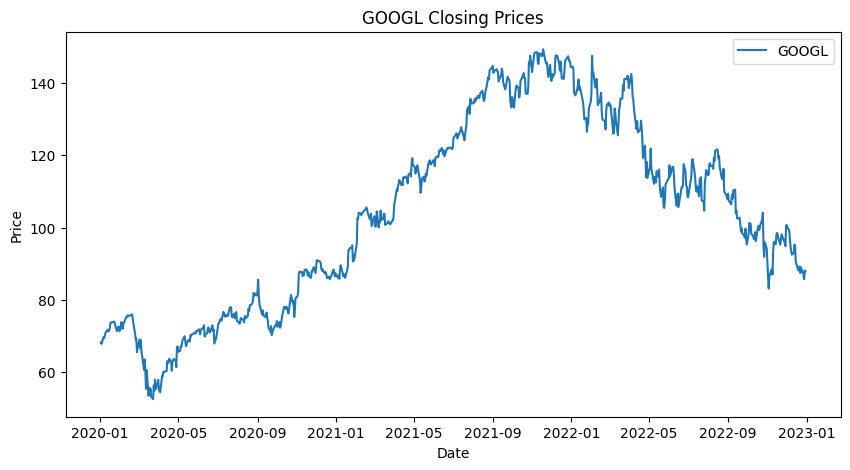

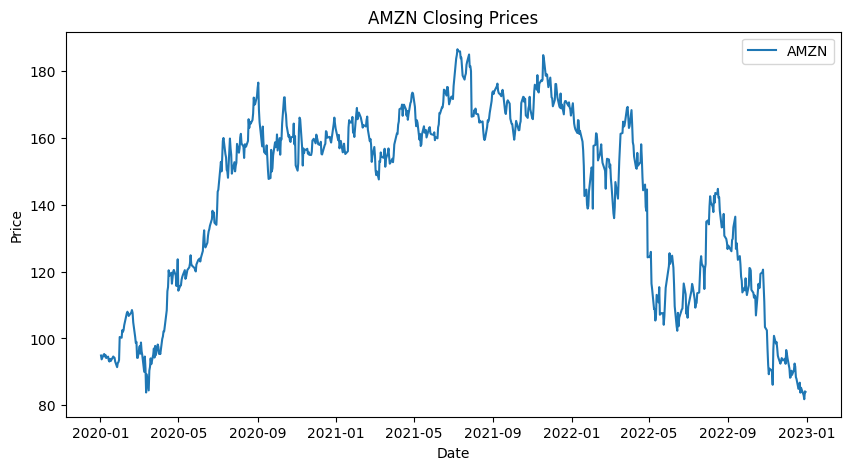

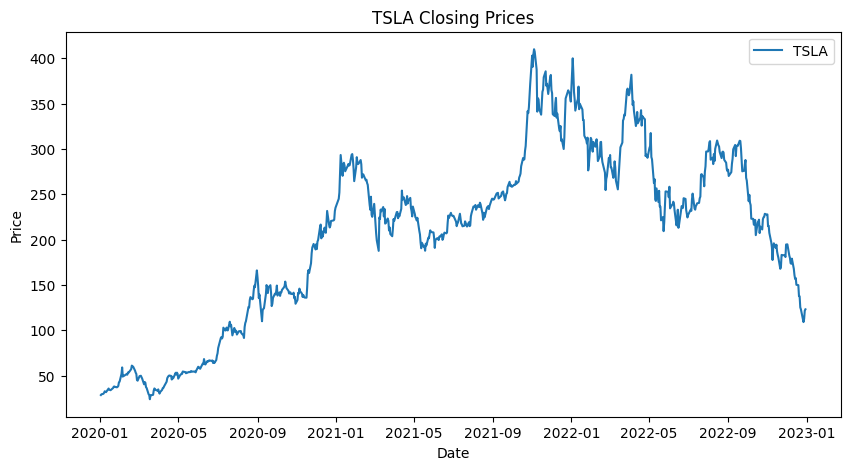

In [6]:
for ticker in tickers:
    plt.figure(figsize=(10, 5))
    plt.plot(data[ticker]['Close'], label=ticker)
    plt.title(f'{ticker} Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

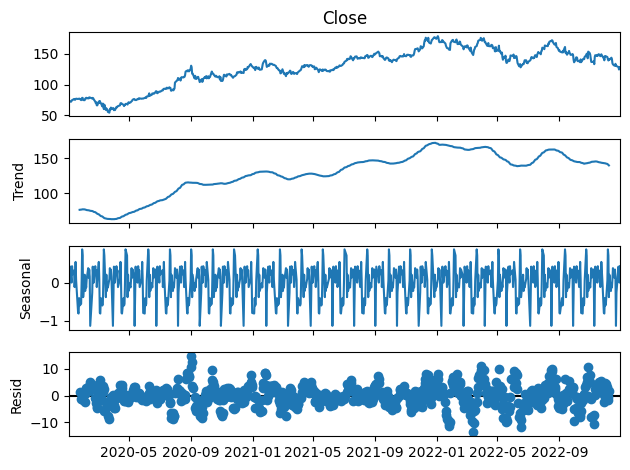

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose time series for one stock
decomposition = seasonal_decompose(data['AAPL']['Close'], period=30)
decomposition.plot()
plt.show()

In [16]:
# Create lagged variables
for lag in range(1, 6):
    data['AAPL'][f'Close_Lag_{lag}'] = data['AAPL']['Close'].shift(lag)

# Calculate rolling statistics
data['AAPL']['Rolling_Mean_7'] = data['AAPL']['Close'].rolling(window=7).mean()
data['AAPL']['Rolling_Std_7'] = data['AAPL']['Close'].rolling(window=7).std()

# Compute percentage changes
data['AAPL']['Daily_Return'] = data['AAPL']['Close'].pct_change()

# Drop rows with NaN values (created by lagging and rolling operations)
data['AAPL'] = data['AAPL'].dropna()

<ipython-input-16-be50555f0b79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AAPL'][f'Close_Lag_{lag}'] = data['AAPL']['Close'].shift(lag)
<ipython-input-16-be50555f0b79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AAPL'][f'Close_Lag_{lag}'] = data['AAPL']['Close'].shift(lag)
<ipython-input-16-be50555f0b79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [17]:
for lag in range(1, 6):
    data['AAPL'][f'Close_Lag_{lag}'] = data['AAPL']['Close'].shift(lag)

<ipython-input-17-97bf909b9f13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AAPL'][f'Close_Lag_{lag}'] = data['AAPL']['Close'].shift(lag)
<ipython-input-17-97bf909b9f13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AAPL'][f'Close_Lag_{lag}'] = data['AAPL']['Close'].shift(lag)
<ipython-input-17-97bf909b9f13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [18]:
data['AAPL']['Rolling_Mean_7'] = data['AAPL']['Close'].rolling(window=7).mean()
data['AAPL']['Rolling_Std_7'] = data['AAPL']['Close'].rolling(window=7).std()

<ipython-input-18-0975a7d1721c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AAPL']['Rolling_Mean_7'] = data['AAPL']['Close'].rolling(window=7).mean()
<ipython-input-18-0975a7d1721c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AAPL']['Rolling_Std_7'] = data['AAPL']['Close'].rolling(window=7).std()


In [19]:
data['AAPL']['Daily_Return'] = data['AAPL']['Close'].pct_change()

<ipython-input-19-c7e1f38fc7da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AAPL']['Daily_Return'] = data['AAPL']['Close'].pct_change()


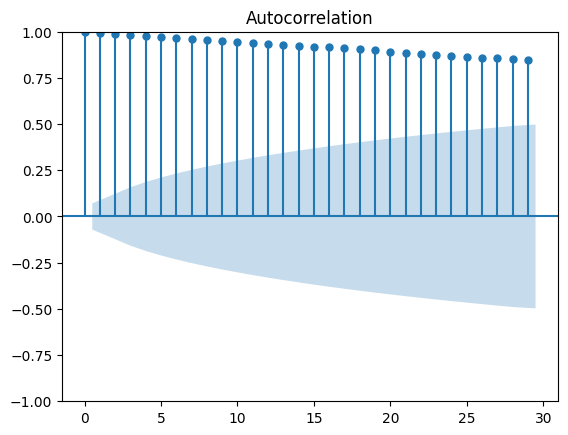

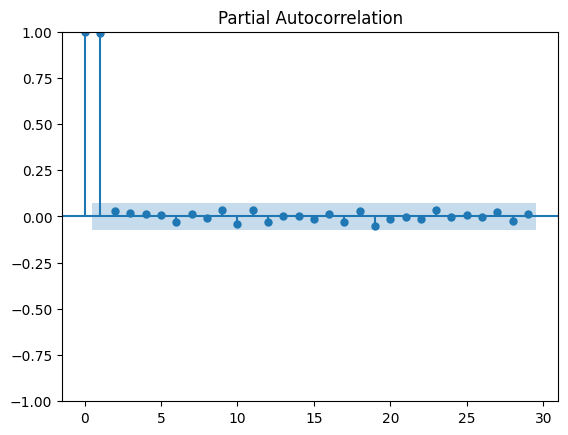

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  756
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1828.724
Date:                Sat, 01 Mar 2025   AIC                           3669.447
Time:                        19:05:35   BIC                           3697.208
Sample:                             0   HQIC                          3680.141
                                - 756                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0631      0.032     -1.988      0.047      -0.125      -0.001
ar.L2         -0.0279      0.032     -0.873      0.383      -0.090       0.035
ar.L3         -0.0320      0.036     -0.900      0.3

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [20]:
# Plot ACF and PACF
plot_acf(data['AAPL']['Close'].dropna())
plot_pacf(data['AAPL']['Close'].dropna())
plt.show()

# Fit ARIMA model
model = ARIMA(data['AAPL']['Close'], order=(5, 1, 0))
results = model.fit()
print(results.summary())

# Forecast future prices
forecast = results.forecast(steps=30)
print(forecast)

In [21]:
print(data['AAPL'].columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object', name='Price')


In [23]:
print(data.columns)

MultiIndex([( 'MSFT',   'Open'),
            ( 'MSFT',   'High'),
            ( 'MSFT',    'Low'),
            ( 'MSFT',  'Close'),
            ( 'MSFT', 'Volume'),
            ( 'AAPL',   'Open'),
            ( 'AAPL',   'High'),
            ( 'AAPL',    'Low'),
            ( 'AAPL',  'Close'),
            ( 'AAPL', 'Volume'),
            ( 'TSLA',   'Open'),
            ( 'TSLA',   'High'),
            ( 'TSLA',    'Low'),
            ( 'TSLA',  'Close'),
            ( 'TSLA', 'Volume'),
            ('GOOGL',   'Open'),
            ('GOOGL',   'High'),
            ('GOOGL',    'Low'),
            ('GOOGL',  'Close'),
            ('GOOGL', 'Volume'),
            ( 'AMZN',   'Open'),
            ( 'AMZN',   'High'),
            ( 'AMZN',    'Low'),
            ( 'AMZN',  'Close'),
            ( 'AMZN', 'Volume')],
           names=['Ticker', 'Price'])


In [24]:
# Extract data for AAPL
aapl_data = data['AAPL'].copy()
print(aapl_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object', name='Price')


In [29]:
# Create lagged variables
for lag in range(1, 6):
    aapl_data[f'Close_Lag_{lag}'] = aapl_data['Close'].shift(lag)

# Calculate rolling statistics
aapl_data['Rolling_Mean_7'] = aapl_data['Close'].rolling(window=7).mean()
aapl_data['Rolling_Std_7'] = aapl_data['Close'].rolling(window=7).std()

# Compute percentage changes
aapl_data['Daily_Return'] = aapl_data['Close'].pct_change()

# Drop rows with NaN values (created by lagging and rolling operations)
aapl_data = aapl_data.dropna()

# Verify the new columns
print(aapl_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Close_Lag_1', 'Close_Lag_2',
       'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5', 'Rolling_Mean_7',
       'Rolling_Std_7', 'Daily_Return'],
      dtype='object', name='Price')


In [37]:
# Prepare features and target
X = aapl_data[['Close_Lag_1', 'Close_Lag_2', 'Rolling_Mean_7', 'Daily_Return']]
y = aapl_data['Close'].shift(-1)  # Shift target variable to predict the next day's closing price

# Drop rows with NaN values in X
X = X.dropna()

# Align y with the remaining rows of X
y = y.loc[X.index]

# Check shapes
print(X.shape, y.shape)  # Should be the same

(744, 4) (744,)


In [40]:
print(X.isnull().sum())  # Check for NaN in features
print(y.isnull().sum())  # Check for NaN in target

Price
Close_Lag_1       0
Close_Lag_2       0
Rolling_Mean_7    0
Daily_Return      0
dtype: int64
1


In [41]:
y = y.dropna()
X = X.loc[y.index]

In [42]:
print(X.isnull().sum())
print(y.isnull().sum())

Price
Close_Lag_1       0
Close_Lag_2       0
Rolling_Mean_7    0
Daily_Return      0
dtype: int64
0


In [43]:
# Grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb = GradientBoostingRegressor()
grid_search = GridSearchCV(gb, param_grid, cv=3)
grid_search.fit(X, y)
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [45]:
# Train the final model with the best hyperparameters
final_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200
)

# Fit the model on the entire dataset
final_model.fit(X, y)

GradientBoostingRegressor(max_depth=5, n_estimators=200)

In [46]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Train the model on the training set
final_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200)

In [48]:
# Predict on the test set
y_pred = final_model.predict(X_test)

In [52]:
!pip install --upgrade scikit-learn

In [54]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

In [55]:
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mse)

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE
mae = mean_absolute_error(y_test, y_pred)  # Calculate MAE
r2 = r2_score(y_test, y_pred)  # Calculate R²

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE: 3.219063270158562
MAE: 2.436608022082947
R²: 0.9888496055220676


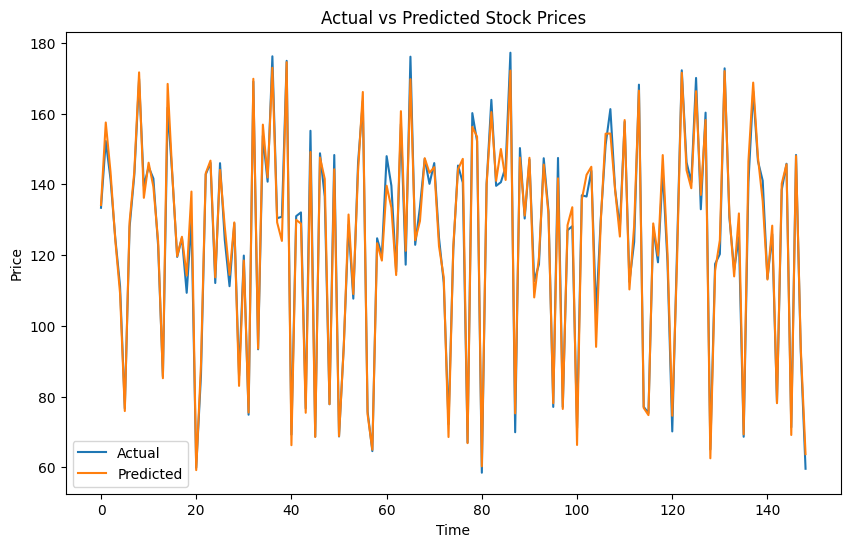

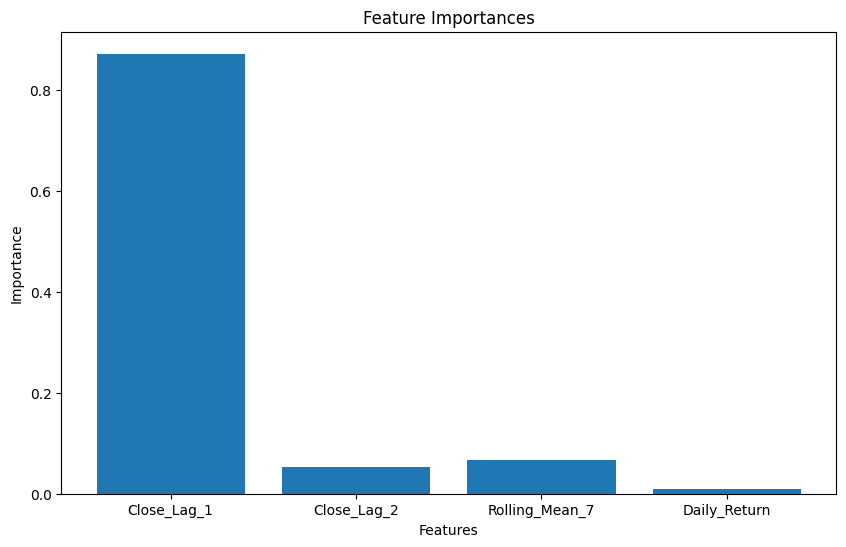

In [58]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Plot feature importances
importances = final_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importances)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

#

In [60]:
# Save the model
import joblib  # Import joblib for saving the model

# Save the model to a file
joblib.dump(final_model, "gradient_boosting_stock_model.pkl")


['gradient_boosting_stock_model.pkl']

In [61]:
# Load the model from the file
loaded_model = joblib.load("gradient_boosting_stock_model.pkl")

# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test)